In [1]:
import cv2
import numpy as np
import pygame
#import cv2.cv as cv
import time
#import smtplib
from matplotlib import pyplot as plt


im = cv2.imread('Pothole.jpg')
# CODE TO CONVERT TO GRAYSCALE


gray1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
# save the image
cv2.imwrite('graypothholeresultnew.jpg', gray1)
#CONTOUR DETECTION CODE
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)

#contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
#contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

contours1, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
contours2, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


##print("cont1==",contours1) 
##print("cont2==",contours2)

#img1 = im.copy()
img2 = im.copy()

#out = cv2.drawContours(img1, contours1, -1, (255,0,0), 2)
out = cv2.drawContours(img2, contours2, -1, (250,250,250),1)
#out = np.hstack([img1, img2])
cv2.imshow('img1',img2)
cv2.waitKey(5000)
plt.subplot(331),plt.imshow(im),plt.title('GRAY')
plt.xticks([]), plt.yticks([])


img = cv2.imread('index2.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2) 
cnt = contours[0]
M = cv2.moments(cnt)

print(M)
perimeter = cv2.arcLength(cnt,True)
print(perimeter)
area = cv2.contourArea(cnt)
print(area)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
print(epsilon)
print(approx)
for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: continue
    #print cv2.contourArea(c)
    x,y,w,h = rect
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
    cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))
cv2.imshow("Show",img)
cv2.waitKey(3000)  
cv2.destroyAllWindows()
k = cv2.isContourConvex(cnt)

#to check convexity
print(k)
#blur
blur = cv2.blur(im,(5,5))
#guassian blur 
gblur = cv2.GaussianBlur(im,(5,5),0)
#median 
median = cv2.medianBlur(im,5)
#erosion
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(median,kernel,iterations = 1)
dilation = cv2.dilate(erosion,kernel,iterations = 5)
#erosion followed dilation
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
#canny edge detection
edges = cv2.Canny(dilation,9,220)  
#plotting using matplotlib
plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
plt.xticks([]), plt.yticks([])        
plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
plt.xticks([]), plt.yticks([]) 
plt.subplot(337),plt.imshow(img,cmap = 'gray')
plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(closing),plt.title('closing')
plt.xticks([]), plt.yticks([])
plt.show()
#alerting the driver
pygame.init()
pygame.mixer.music.load("buzz.mp3")
pygame.mixer.music.play()
time.sleep(5)

#geolocation
ip = '157.37.187.247'
url = 'http://api.ipstack.com/'+ip+"?access_key=f8a10d818a97380bff4081cf06720820"
r = requests.get(url)
js = r.json()

js['country_code']
js['country_name']
#js['time_zone']
js['city']
js.items()

#content ="detection of pothole in locality basapura road hosur road junction "
#mail = smtplib.SMTP('smtp.gmail.com',587)
#mail.ehlo()
#mail.starttls()
#mail.login('harika3196@gmail.com','hariammu3196@gmail.com')
#mail.sendmail('fromemail','receiver',content)
#mail.close()



pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html
{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
0.0
0.0
[[[175 144]]]
False


NameError: name 'requests' is not defined

In [1]:
#!/usr/bin/python36


import cv2
import numpy as np

import requests
url1 ="http://192.168.43.1:8080/shot.jpg"

while True: #for video streaming
	geturl=requests.get(url1) #connect to the url
	photoweb=geturl.content #load content
	type(photoweb) # show datatype
	photobyte=bytearray(photoweb) #photo binary(bytes) into binary array
	imageId=np.array(photobyte) #bytearray converted into id numpy array
	frame = cv2.imdecode(imageId,-1) 
	
	reframe=cv2.resize(frame,(400,400))
	
	#frame3=np.concatenate((reframe1,reframe2),axis=1)
	
	cv2.imshow("hi",reframe)
	if cv2.waitKey(1) == 13: # 13 = ascii value of enter
		break
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import pygame
#import cv2.cv as cv
import time
#import smtplib
from matplotlib import pyplot as plt



import requests
url1 ="http://192.168.43.1:8080/shot.jpg"

while True: #for video streaming
    geturl=requests.get(url1) #connect to the url
    photoweb=geturl.content #load content
    type(photoweb) # show datatype
    photobyte=bytearray(photoweb) #photo binary(bytes) into binary array
    imageId=np.array(photobyte) #bytearray converted into id numpy array
    frame = cv2.imdecode(imageId,-1) 

    reframe=cv2.resize(frame,(400,400))
    cv2.imshow("hi",reframe)
    im = cv2.imread(imageId)
    # CODE TO CONVERT TO GRAYSCALE


    gray1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # save the image
    cv2.imwrite('graypothholeresultnew.jpg', gray1)
    #CONTOUR DETECTION CODE
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,127,255,0)

    #contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    #contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    contours1, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contours2, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


    print("cont1==",contours1) 
    print("cont2==",contours2)

    #img1 = im.copy()
    img2 = im.copy()

    #out = cv2.drawContours(img1, contours1, -1, (255,0,0), 2)
    out = cv2.drawContours(img2, contours2, -1, (250,250,250),1)
    #out = np.hstack([img1, img2])
    cv2.imshow('img1',img2)
    cv2.waitKey(5000)
    plt.subplot(331),plt.imshow(im),plt.title('GRAY')
    plt.xticks([]), plt.yticks([])


    img = cv2.imread('index2.jpg',0)
    ret,thresh = cv2.threshold(img,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2) 
    cnt = contours[0]
    M = cv2.moments(cnt)

    print(M)
    perimeter = cv2.arcLength(cnt,True)
    print(perimeter)
    area = cv2.contourArea(cnt)
    print(area)
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    print(epsilon)
    print(approx)
    for c in contours:
        rect = cv2.boundingRect(c)
        if rect[2] < 100 or rect[3] < 100: continue
        #print cv2.contourArea(c)
        x,y,w,h = rect
        cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
        cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))
    cv2.imshow("Show",img)
    cv2.waitKey(3000)  
    cv2.destroyAllWindows()
    k = cv2.isContourConvex(cnt)

    #to check convexity
    print(k)
    #blur
    blur = cv2.blur(im,(5,5))
    #guassian blur 
    gblur = cv2.GaussianBlur(im,(5,5),0)
    #median 
    median = cv2.medianBlur(im,5)
    #erosion
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(median,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 5)
    #erosion followed dilation
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    #canny edge detection
    edges = cv2.Canny(dilation,9,220)  
    #plotting using matplotlib
    plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
    plt.xticks([]), plt.yticks([])
    plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
    plt.xticks([]), plt.yticks([])        
    plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
    plt.xticks([]), plt.yticks([]) 
    plt.subplot(337),plt.imshow(img,cmap = 'gray')
    plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(338),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
    plt.xticks([]), plt.yticks([])
    plt.subplot(336),plt.imshow(closing),plt.title('closing')
    plt.xticks([]), plt.yticks([])
    plt.show()
    #alerting the driver
    pygame.init()
    pygame.mixer.music.load("buzz.mp3")
    pygame.mixer.music.play()
    time.sleep(5)

    #content ="detection of pothole in locality basapura road hosur road junction "
    #mail = smtplib.SMTP('smtp.gmail.com',587)
    #mail.ehlo()
    #mail.starttls()
    #mail.login('harika3196@gmail.com','hariammu3196@gmail.com')
    #mail.sendmail('fromemail','receiver',content)
    #mail.close()

    if cv2.waitKey(1) == 13: # 13 = ascii value of enter
        break
cv2.destroyAllWindows()




In [ ]:

scipy.misc.toimage(image_array, cmin=0.0, cmax=...).save('outfile.jpg')

In [ ]:
import cv2
import numpy as np
import pygame
#import cv2.cv as cv
import time
#import smtplib
from matplotlib import pyplot as plt
import scipy.misc


import requests
url1 ="http://192.168.43.1:8080/shot.jpg"

while True: #for video streaming
    geturl=requests.get(url1) #connect to the url
    photoweb=geturl.content #load content
    type(photoweb) # show datatype
    photobyte=bytearray(photoweb) #photo binary(bytes) into binary array
    imageId=np.array(photobyte) #bytearray converted into id numpy array
    frame = cv2.imdecode(imageId,-1) 

    reframe=cv2.resize(frame,(400,400))
    cv2.imshow("hi",reframe)
    #scipy.misc.toimage(imageId, cmin=0.0, cmax=...).save('outfile.jpg')
    outfile=scipy.misc.toimage(imageId)
    
    im = cv2.imread(outfile)
    # CODE TO CONVERT TO GRAYSCALE


    gray1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # save the image
    cv2.imwrite('graypothholeresultnew.jpg', gray1)
    #CONTOUR DETECTION CODE
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,127,255,0)

    #contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    #contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    contours1, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contours2, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


    #print("cont1==",contours1) 
    #print("cont2==",contours2)

    #img1 = im.copy()
    img2 = im.copy()

    #out = cv2.drawContours(img1, contours1, -1, (255,0,0), 2)
    out = cv2.drawContours(img2, contours2, -1, (250,250,250),1)
    #out = np.hstack([img1, img2])
    cv2.imshow('img1',img2)
    cv2.waitKey(5000)
    plt.subplot(331),plt.imshow(im),plt.title('GRAY')
    plt.xticks([]), plt.yticks([])


    img = cv2.imread('index2.jpg',0)
    ret,thresh = cv2.threshold(img,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2) 
    cnt = contours[0]
    M = cv2.moments(cnt)

    print(M)
    perimeter = cv2.arcLength(cnt,True)
    print(perimeter)
    area = cv2.contourArea(cnt)
    print(area)
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    print(epsilon)
    print(approx)
    for c in contours:
        rect = cv2.boundingRect(c)
        if rect[2] < 100 or rect[3] < 100: continue
        #print cv2.contourArea(c)
        x,y,w,h = rect
        cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
        cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))
    cv2.imshow("Show",img)
    cv2.waitKey(3000)  
    cv2.destroyAllWindows()
    k = cv2.isContourConvex(cnt)

    #to check convexity
    print(k)
    #blur
    blur = cv2.blur(im,(5,5))
    #guassian blur 
    gblur = cv2.GaussianBlur(im,(5,5),0)
    #median 
    median = cv2.medianBlur(im,5)
    #erosion
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(median,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 5)
    #erosion followed dilation
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    #canny edge detection
    edges = cv2.Canny(dilation,9,220)  
    #plotting using matplotlib
    plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
    plt.xticks([]), plt.yticks([])
    plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
    plt.xticks([]), plt.yticks([])        
    plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
    plt.xticks([]), plt.yticks([]) 
    plt.subplot(337),plt.imshow(img,cmap = 'gray')
    plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(338),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
    plt.xticks([]), plt.yticks([])
    plt.subplot(336),plt.imshow(closing),plt.title('closing')
    plt.xticks([]), plt.yticks([])
    plt.show()
    #alerting the driver
    pygame.init()
    pygame.mixer.music.load("buzz.mp3")
    pygame.mixer.music.play()
    time.sleep(5)
    
    
    ''' #!/usr/bin/python36

    import os
    import smtplib
    import getpass
    from email.mime.text import MIMEText
    from email.mime.image import MIMEImage
    from email.mime.multipart import MIMEMultipart

    username= "rawatchetan133@gmail.com"

    google_mail = smtplib.SMTP(host='smtp.gmail.com', port=587)

    google_mail.starttls()
    print("enter your password ")
    password=getpass.getpass()
    google_mail.login(username , password)
    msg=MIMEMultipart()
    text = MIMEText("This is a mail")
    msg.attach(text)
    fp = open('C:\Users\Asus\Desktop\pothole_detection_v02\graypothholeresultnew.jpg','rb')
    image= MIMEImage(fp.read())
    fp.close()
    msg.attach(image)

    google_mail.sendmail(username , 'chetanrawat@live.com' , msg.as_string())
    print("successful")
    google_mail.quit()
    '''
    #content ="detection of pothole in locality basapura road hosur road junction "
    #mail = smtplib.SMTP('smtp.gmail.com',587)
    #mail.ehlo()
    #mail.starttls()
    #mail.login('harika3196@gmail.com','hariammu3196@gmail.com')
    #mail.sendmail('fromemail','receiver',content)
    #mail.close()

    if cv2.waitKey(1) == 13: # 13 = ascii value of enter
        break
cv2.destroyAllWindows()




In [ ]:
from PIL import Image
imgg = Image.fromarray(A)
imgg.save("your_file.jpeg")

cont1== [array([[[    0, 61595]],

       [[    0, 61596]],

       [[    0, 61597]],

       [[    0, 61596]]], dtype=int32), array([[[    0, 61593]]], dtype=int32), array([[[    0, 61590]],

       [[    0, 61591]]], dtype=int32), array([[[    0, 61587]],

       [[    0, 61588]]], dtype=int32), array([[[    0, 61585]]], dtype=int32), array([[[    0, 61581]]], dtype=int32), array([[[    0, 61579]]], dtype=int32), array([[[    0, 61574]]], dtype=int32), array([[[    0, 61568]]], dtype=int32), array([[[    0, 61563]],

       [[    0, 61564]],

       [[    0, 61565]],

       [[    0, 61564]]], dtype=int32), array([[[    0, 61551]],

       [[    0, 61552]]], dtype=int32), array([[[    0, 61542]],

       [[    0, 61543]],

       [[    0, 61544]],

       [[    0, 61543]]], dtype=int32), array([[[    0, 61539]]], dtype=int32), array([[[    0, 61536]],

       [[    0, 61537]]], dtype=int32), array([[[    0, 61533]]], dtype=int32), array([[[    0, 61531]]], dtype=int32), array([[[    

cont2== [array([[[    0, 61595]],

       [[    0, 61597]]], dtype=int32), array([[[    0, 61593]]], dtype=int32), array([[[    0, 61590]],

       [[    0, 61591]]], dtype=int32), array([[[    0, 61587]],

       [[    0, 61588]]], dtype=int32), array([[[    0, 61585]]], dtype=int32), array([[[    0, 61581]]], dtype=int32), array([[[    0, 61579]]], dtype=int32), array([[[    0, 61574]]], dtype=int32), array([[[    0, 61568]]], dtype=int32), array([[[    0, 61563]],

       [[    0, 61565]]], dtype=int32), array([[[    0, 61551]],

       [[    0, 61552]]], dtype=int32), array([[[    0, 61542]],

       [[    0, 61544]]], dtype=int32), array([[[    0, 61539]]], dtype=int32), array([[[    0, 61536]],

       [[    0, 61537]]], dtype=int32), array([[[    0, 61533]]], dtype=int32), array([[[    0, 61531]]], dtype=int32), array([[[    0, 61529]]], dtype=int32), array([[[    0, 61527]]], dtype=int32), array([[[    0, 61516]],

       [[    0, 61518]]], dtype=int32), array([[[    0, 61502]]

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
0.0
0.0
[[[175 144]]]
False


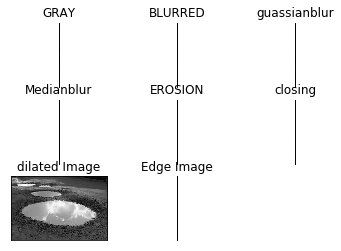

cont1== [array([[[    0, 61419]],

       [[    0, 61420]]], dtype=int32), array([[[    0, 61416]]], dtype=int32), array([[[    0, 61406]]], dtype=int32), array([[[    0, 61400]]], dtype=int32), array([[[    0, 61395]],

       [[    0, 61396]],

       [[    0, 61397]],

       [[    0, 61398]],

       [[    0, 61397]],

       [[    0, 61396]]], dtype=int32), array([[[    0, 61390]]], dtype=int32), array([[[    0, 61373]],

       [[    0, 61374]]], dtype=int32), array([[[    0, 61367]],

       [[    0, 61368]]], dtype=int32), array([[[    0, 61360]],

       [[    0, 61361]],

       [[    0, 61362]],

       [[    0, 61363]],

       [[    0, 61362]],

       [[    0, 61361]]], dtype=int32), array([[[    0, 61357]]], dtype=int32), array([[[    0, 61350]],

       [[    0, 61351]]], dtype=int32), array([[[    0, 61347]]], dtype=int32), array([[[    0, 61342]]], dtype=int32), array([[[    0, 61337]]], dtype=int32), array([[[    0, 61329]]], dtype=int32), array([[[    0, 61324]]], d

cont2== [array([[[    0, 61419]],

       [[    0, 61420]]], dtype=int32), array([[[    0, 61416]]], dtype=int32), array([[[    0, 61406]]], dtype=int32), array([[[    0, 61400]]], dtype=int32), array([[[    0, 61395]],

       [[    0, 61398]]], dtype=int32), array([[[    0, 61390]]], dtype=int32), array([[[    0, 61373]],

       [[    0, 61374]]], dtype=int32), array([[[    0, 61367]],

       [[    0, 61368]]], dtype=int32), array([[[    0, 61360]],

       [[    0, 61363]]], dtype=int32), array([[[    0, 61357]]], dtype=int32), array([[[    0, 61350]],

       [[    0, 61351]]], dtype=int32), array([[[    0, 61347]]], dtype=int32), array([[[    0, 61342]]], dtype=int32), array([[[    0, 61337]]], dtype=int32), array([[[    0, 61329]]], dtype=int32), array([[[    0, 61324]]], dtype=int32), array([[[    0, 61310]],

       [[    0, 61311]]], dtype=int32), array([[[    0, 61291]]], dtype=int32), array([[[    0, 61278]],

       [[    0, 61279]]], dtype=int32), array([[[    0, 61274]]

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
0.0
0.0
[[[175 144]]]
False


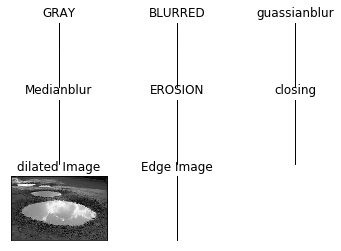

KeyboardInterrupt: 

In [6]:
import cv2
import numpy as np
import pygame
#import cv2.cv as cv
import time
#import smtplib
from matplotlib import pyplot as plt
##import scipy.misc
from PIL import Image


import requests
url1 ="http://192.168.43.1:8080/shot.jpg"

while True: #for video streaming
    geturl=requests.get(url1) #connect to the url
    photoweb=geturl.content #load content
    type(photoweb) # show datatype
    photobyte=bytearray(photoweb) #photo binary(bytes) into binary array
    imageId=np.array(photobyte) #bytearray converted into id numpy array
    frame = cv2.imdecode(imageId,-1) 

    reframe=cv2.resize(frame,(400,400))
    cv2.imshow("hi",reframe)
    ##scipy.misc.toimage(imageId, cmin=0.0, cmax=...).save('outfile.jpg')
    
    ##imgg = Image.fromarray(imageId)
    ##imgg.save("outfile.jpg")
    
    cv2.imwrite("outfile.jpg", imageId)
    
    im = cv2.imread('outfile.jpg')
    # CODE TO CONVERT TO GRAYSCALE


    gray1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # save the image
    cv2.imwrite('graypothholeresultnew.jpg', gray1)
    #CONTOUR DETECTION CODE
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,127,255,0)

    #contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    #contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    contours1, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contours2, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


    print("cont1==",contours1) 
    print("cont2==",contours2)

    #img1 = im.copy()
    img2 = im.copy()

    #out = cv2.drawContours(img1, contours1, -1, (255,0,0), 2)
    out = cv2.drawContours(img2, contours2, -1, (250,250,250),1)
    #out = np.hstack([img1, img2])
    cv2.imshow('img1',img2)
    cv2.waitKey(5000)
    plt.subplot(331),plt.imshow(im),plt.title('GRAY')
    plt.xticks([]), plt.yticks([])


    img = cv2.imread('index2.jpg',0)
    ret,thresh = cv2.threshold(img,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2) 
    cnt = contours[0]
    M = cv2.moments(cnt)

    print(M)
    perimeter = cv2.arcLength(cnt,True)
    print(perimeter)
    area = cv2.contourArea(cnt)
    print(area)
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    print(epsilon)
    print(approx)
    for c in contours:
        rect = cv2.boundingRect(c)
        if rect[2] < 100 or rect[3] < 100: continue
        #print cv2.contourArea(c)
        x,y,w,h = rect
        cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
        cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))
    cv2.imshow("Show",img)
    cv2.waitKey(3000)  
    cv2.destroyAllWindows()
    k = cv2.isContourConvex(cnt)

    #to check convexity
    print(k)
    #blur
    blur = cv2.blur(im,(5,5))
    #guassian blur 
    gblur = cv2.GaussianBlur(im,(5,5),0)
    #median 
    median = cv2.medianBlur(im,5)
    #erosion
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(median,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 5)
    #erosion followed dilation
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    #canny edge detection
    edges = cv2.Canny(dilation,9,220)  
    #plotting using matplotlib
    plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
    plt.xticks([]), plt.yticks([])
    plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
    plt.xticks([]), plt.yticks([])        
    plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
    plt.xticks([]), plt.yticks([]) 
    plt.subplot(337),plt.imshow(img,cmap = 'gray')
    plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(338),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
    plt.xticks([]), plt.yticks([])
    plt.subplot(336),plt.imshow(closing),plt.title('closing')
    plt.xticks([]), plt.yticks([])
    plt.show()
    #alerting the driver
    pygame.init()
    pygame.mixer.music.load("buzz.mp3")
    pygame.mixer.music.play()
    time.sleep(5)

    #content ="detection of pothole in locality basapura road hosur road junction "
    #mail = smtplib.SMTP('smtp.gmail.com',587)
    #mail.ehlo()
    #mail.starttls()
    #mail.login('harika3196@gmail.com','hariammu3196@gmail.com')
    #mail.sendmail('fromemail','receiver',content)
    #mail.close()

    if cv2.waitKey(1) == 13: # 13 = ascii value of enter
        break
cv2.destroyAllWindows()




In [ ]:
import cv2
import numpy as np
import pygame
#import cv2.cv as cv
import time
#import smtplib
from matplotlib import pyplot as plt
import scipy.misc


import requests
url1 ="http://192.168.43.1:8080/shot.jpg"

while True: #for video streaming
    geturl=requests.get(url1) #connect to the url
    photoweb=geturl.content #load content
    type(photoweb) # show datatype
    photobyte=bytearray(photoweb) #photo binary(bytes) into binary array
    imageId=np.array(photobyte) #bytearray converted into id numpy array
    frame = cv2.imdecode(imageId,-1) 

    reframe=cv2.resize(frame,(400,400))
    cv2.imshow("hi",reframe)
    #scipy.misc.toimage(imageId, cmin=0.0, cmax=...).save('outfile.jpg')
    #scipy.misc.toimage(imageId)

In [8]:
import scipy.misc
import requests
from PIL import Image

url1 ="http://192.168.43.1:8080/shot.jpg"
geturl=requests.get(url1) #connect to the url
photoweb=geturl.content #load content
type(photoweb) # show datatype
photobyte=bytearray(photoweb) #photo binary(bytes) into binary array
imageId=np.array(photobyte) #bytearray converted into id numpy array

#scipy.misc.toimage(imageId, cmin=0.0, cmax=...).save('outfile.jpg')
imageId.shape
#Image.fromarray(imageId)

#rgb=scipy.misc.toimage(imageId)

(34354,)

In [7]:
import urllib2
import json

# Automatically geolocate the connecting IP
f = urllib2.urlopen('http://freegeoip.net/json/')
json_string = f.read()
f.close()
location = json.loads(json_string)
print(location)
location_city = location['city']
location_state = location['region_name']
location_country = location['country_name']
location_zip = location['zipcode']

ModuleNotFoundError: No module named 'urllib2'

In [24]:
import requests
ip = '157.37.187.247'
url = 'http://api.ipstack.com/'+ip+"?access_key=f8a10d818a97380bff4081cf06720820"
r = requests.get(url)
js = r.json()

js['country_code']
js['country_name']
#js['time_zone']
js['city']
js.items()

dict_items([('ip', '157.37.187.247'), ('type', 'ipv4'), ('continent_code', 'AS'), ('continent_name', 'Asia'), ('country_code', 'IN'), ('country_name', 'India'), ('region_code', 'RJ'), ('region_name', 'Rajasthan'), ('city', 'Jaipur'), ('zip', '302001'), ('latitude', 26.9167), ('longitude', 75.8167), ('location', {'geoname_id': 1269515, 'capital': 'New Delhi', 'languages': [{'code': 'hi', 'name': 'Hindi', 'native': 'हिन्दी'}, {'code': 'en', 'name': 'English', 'native': 'English'}], 'country_flag': 'http://assets.ipstack.com/flags/in.svg', 'country_flag_emoji': '🇮🇳', 'country_flag_emoji_unicode': 'U+1F1EE U+1F1F3', 'calling_code': '91', 'is_eu': False})])

dict_items([('ip', '157.37.187.247'), ('type', 'ipv4'), ('continent_code', 'AS'), ('continent_name', 'Asia'), ('country_code', 'IN'), ('country_name', 'India'), ('region_code', 'RJ'), ('region_name', 'Rajasthan'), ('city', 'Jaipur'), ('zip', '302001'), ('latitude', 26.9167), ('longitude', 75.8167), ('location', {'geoname_id': 1269515, 'capital': 'New Delhi', 'languages': [{'code': 'hi', 'name': 'Hindi', 'native': 'हिन्दी'}, {'code': 'en', 'name': 'English', 'native': 'English'}], 'country_flag': 'http://assets.ipstack.com/flags/in.svg', 'country_flag_emoji': '🇮🇳', 'country_flag_emoji_unicode': 'U+1F1EE U+1F1F3', 'calling_code': '91', 'is_eu': False})])

In [ ]:
import cv2
import numpy as np
import pygame
#import cv2.cv as cv
import time
#import smtplib
from matplotlib import pyplot as plt
##import scipy.misc
from PIL import Image
import requests

url1 ="http://192.168.43.1:8080/shot.jpg"

while True: #for video streaming
    geturl=requests.get(url1) #connect to the url
    photoweb=geturl.content #load content
    type(photoweb) # show datatype
    photobyte=bytearray(photoweb) #photo binary(bytes) into binary array
    imageId=np.array(photobyte) #bytearray converted into id numpy array
    frame = cv2.imdecode(imageId,-1) 

    reframe=cv2.resize(frame,(400,400))
    cv2.imshow("hi",reframe)
    ##scipy.misc.toimage(imageId, cmin=0.0, cmax=...).save('outfile.jpg')
    
    ##imgg = Image.fromarray(imageId)
    ##imgg.save("outfile.jpg")
    
    cv2.imwrite("outfile.jpg", imageId)
    
    im = cv2.imread('outfile.jpg')
    # CODE TO CONVERT TO GRAYSCALE


    gray1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # save the image
    cv2.imwrite('graypothholeresultnew.jpg', gray1)
    #CONTOUR DETECTION CODE
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,127,255,0)

    #contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    #contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    contours1, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contours2, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


    print("cont1==",contours1) 
    print("cont2==",contours2)

    #img1 = im.copy()
    img2 = im.copy()

    #out = cv2.drawContours(img1, contours1, -1, (255,0,0), 2)
    out = cv2.drawContours(img2, contours2, -1, (250,250,250),1)
    #out = np.hstack([img1, img2])
    cv2.imshow('img1',img2)
    cv2.waitKey(5000)
    plt.subplot(331),plt.imshow(im),plt.title('GRAY')
    plt.xticks([]), plt.yticks([])


    img = cv2.imread('index2.jpg',0)
    ret,thresh = cv2.threshold(img,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2) 
    cnt = contours[0]
    M = cv2.moments(cnt)

    print(M)
    perimeter = cv2.arcLength(cnt,True)
    print(perimeter)
    area = cv2.contourArea(cnt)
    print(area)
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    print(epsilon)
    print(approx)
    for c in contours:
        rect = cv2.boundingRect(c)
        if rect[2] < 100 or rect[3] < 100: continue
        #print cv2.contourArea(c)
        x,y,w,h = rect
        cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
        cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))
    cv2.imshow("Show",img)
    cv2.waitKey(3000)  
    cv2.destroyAllWindows()
    k = cv2.isContourConvex(cnt)

    #to check convexity
    print(k)
    #blur
    blur = cv2.blur(im,(5,5))
    #guassian blur 
    gblur = cv2.GaussianBlur(im,(5,5),0)
    #median 
    median = cv2.medianBlur(im,5)
    #erosion
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(median,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 5)
    #erosion followed dilation
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    #canny edge detection
    edges = cv2.Canny(dilation,9,220)  
    #plotting using matplotlib
    plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
    plt.xticks([]), plt.yticks([])
    plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
    plt.xticks([]), plt.yticks([])        
    plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
    plt.xticks([]), plt.yticks([]) 
    plt.subplot(337),plt.imshow(img,cmap = 'gray')
    plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(338),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
    plt.xticks([]), plt.yticks([])
    plt.subplot(336),plt.imshow(closing),plt.title('closing')
    plt.xticks([]), plt.yticks([])
    plt.show()
    #alerting the driver
    pygame.init()
    pygame.mixer.music.load("buzz.mp3")
    pygame.mixer.music.play()
    time.sleep(5)
    
    #geolocation
    ip = '157.37.187.247'
    url = 'http://api.ipstack.com/'+ip+"?access_key=f8a10d818a97380bff4081cf06720820"
    r = requests.get(url)
    js = r.json()

    js['country_code']
    js['country_name']
    #js['time_zone']
    js['city']
    js.items()

    #content ="detection of pothole in locality basapura road hosur road junction "
    #mail = smtplib.SMTP('smtp.gmail.com',587)
    #mail.ehlo()
    #mail.starttls()
    #mail.login('harika3196@gmail.com','hariammu3196@gmail.com')
    #mail.sendmail('fromemail','receiver',content)
    #mail.close()

    if cv2.waitKey(1) == 13: # 13 = ascii value of enter
        break
cv2.destroyAllWindows()




cont1== [array([[[1088,  800]],

       [[1089,  800]],

       [[1090,  800]],

       [[1089,  800]]], dtype=int32), array([[[1040,  767]]], dtype=int32), array([[[895, 763]],

       [[895, 764]]], dtype=int32), array([[[680, 759]],

       [[680, 760]],

       [[679, 761]],

       [[678, 761]],

       [[677, 761]],

       [[676, 761]],

       [[675, 762]],

       [[674, 762]],

       [[673, 763]],

       [[673, 764]],

       [[672, 765]],

       [[672, 766]],

       [[671, 767]],

       [[670, 767]],

       [[669, 768]],

       [[669, 769]],

       [[669, 770]],

       [[668, 771]],

       [[667, 772]],

       [[666, 773]],

       [[666, 774]],

       [[666, 775]],

       [[666, 776]],

       [[666, 777]],

       [[666, 778]],

       [[666, 779]],

       [[666, 780]],

       [[666, 781]],

       [[666, 782]],

       [[666, 783]],

       [[665, 784]],

       [[666, 785]],

       [[666, 786]],

       [[667, 786]],

       [[668, 787]],

       [[669, 7

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
0.0
0.0
[[[175 144]]]
False


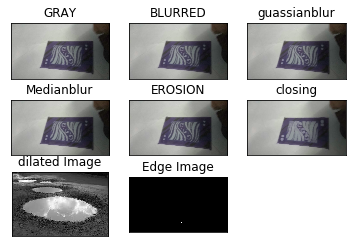

cont1== [array([[[1158, 1000]],

       [[1158, 1001]],

       [[1158, 1002]],

       [[1158, 1003]],

       [[1158, 1004]],

       [[1158, 1005]],

       [[1158, 1006]],

       [[1158, 1007]],

       [[1159, 1007]],

       [[1159, 1006]],

       [[1159, 1005]],

       [[1159, 1004]],

       [[1159, 1003]],

       [[1159, 1002]],

       [[1159, 1001]],

       [[1159, 1000]]], dtype=int32), array([[[1184,  984]],

       [[1184,  985]],

       [[1185,  984]]], dtype=int32), array([[[1335,  856]]], dtype=int32), array([[[824, 829]],

       [[823, 830]],

       [[822, 831]],

       [[822, 832]],

       [[822, 833]],

       [[821, 834]],

       [[822, 835]],

       [[823, 835]],

       [[824, 835]],

       [[825, 835]],

       [[826, 834]],

       [[827, 834]],

       [[828, 835]],

       [[829, 834]],

       [[829, 833]],

       [[828, 832]],

       [[828, 831]],

       [[828, 830]],

       [[827, 829]],

       [[826, 829]],

       [[825, 829]]], dtype=i

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
0.0
0.0
[[[175 144]]]
False


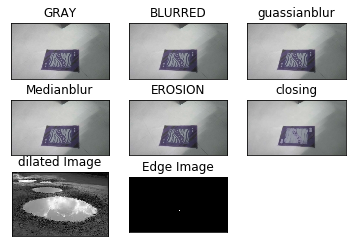

cont1== [array([[[1094, 1078]],

       [[1094, 1079]],

       [[1095, 1079]],

       [[1096, 1079]],

       [[1097, 1079]],

       [[1098, 1079]],

       [[1099, 1079]],

       [[1100, 1079]],

       [[1101, 1079]],

       [[1102, 1079]],

       [[1103, 1079]],

       [[1103, 1078]],

       [[1102, 1078]],

       [[1101, 1078]],

       [[1100, 1078]],

       [[1099, 1078]],

       [[1098, 1078]],

       [[1097, 1078]],

       [[1096, 1078]],

       [[1095, 1078]]], dtype=int32), array([[[ 998,  991]],

       [[ 999,  992]],

       [[ 998,  993]],

       [[ 997,  993]],

       [[ 996,  994]],

       [[ 996,  995]],

       [[ 997,  995]],

       [[ 998,  995]],

       [[ 999,  996]],

       [[1000,  997]],

       [[1000,  998]],

       [[1000,  997]],

       [[1001,  996]],

       [[1001,  995]],

       [[1000,  995]],

       [[ 999,  994]],

       [[ 999,  993]],

       [[ 999,  992]],

       [[ 999,  991]]], dtype=int32), array([[[1267,  990]],

   

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
0.0
0.0
[[[175 144]]]
False


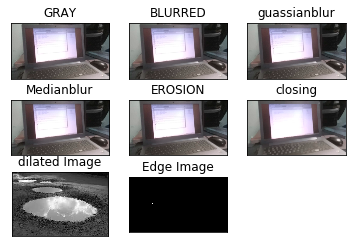

cont1== [array([[[557, 910]],

       [[556, 911]],

       [[555, 911]],

       [[554, 911]],

       [[553, 911]],

       [[552, 911]],

       [[551, 911]],

       [[550, 911]],

       [[550, 912]],

       [[549, 913]],

       [[548, 914]],

       [[547, 914]],

       [[546, 915]],

       [[545, 915]],

       [[544, 915]],

       [[543, 915]],

       [[542, 916]],

       [[541, 916]],

       [[540, 916]],

       [[539, 917]],

       [[538, 917]],

       [[537, 917]],

       [[536, 917]],

       [[535, 918]],

       [[534, 918]],

       [[533, 918]],

       [[532, 918]],

       [[531, 919]],

       [[530, 919]],

       [[529, 920]],

       [[528, 920]],

       [[527, 920]],

       [[526, 920]],

       [[525, 920]],

       [[524, 920]],

       [[523, 921]],

       [[522, 921]],

       [[521, 921]],

       [[520, 922]],

       [[519, 922]],

       [[518, 922]],

       [[517, 923]],

       [[517, 924]],

       [[518, 925]],

       [[519, 925]],

 

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
0.0
0.0
[[[175 144]]]
False


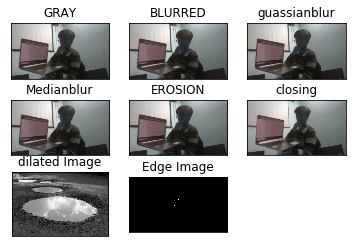

cont1== []
cont2== []
{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
0.0
0.0
0.0
[[[175 144]]]
False


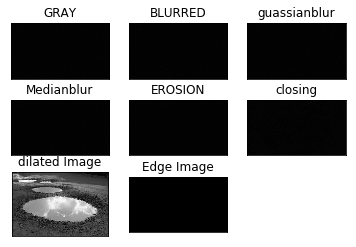

KeyboardInterrupt: 

In [2]:
import cv2
import numpy as np
import pygame
#import cv2.cv as cv
import time
#import smtplib
from matplotlib import pyplot as plt
##import scipy.misc
from PIL import Image
import requests

url1 ="http://192.168.43.1:8080/shot.jpg"

while True: #for video streaming
    geturl=requests.get(url1) #connect to the url
    photoweb=geturl.content #load content
    type(photoweb) # show datatype
    photobyte=bytearray(photoweb) #photo binary(bytes) into binary array
    imageId=np.array(photobyte) #bytearray converted into id numpy array
    frame = cv2.imdecode(imageId,-1)  #convert to 3d: cv2 support,  # -1 is a flag here

    reframe=cv2.resize(frame,(400,400))
    cv2.imshow("hi",reframe)
    ##scipy.misc.toimage(imageId, cmin=0.0, cmax=...).save('outfile.jpg')
    
    ##imgg = Image.fromarray(imageId)
    ##imgg.save("outfile.jpg")
    
    #cv2.imwrite("outfile.jpg", imageId)
    cv2.imwrite("outfile.jpg", frame)
    
    im = cv2.imread('outfile.jpg')
    # CODE TO CONVERT TO GRAYSCALE


    gray1 = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    # save the image
    cv2.imwrite('graypothholeresultnew.jpg', gray1)
    #CONTOUR DETECTION CODE
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,127,255,0)

    #contours1, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    #contours2, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    contours1, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    contours2, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


    print("cont1==",contours1) 
    print("cont2==",contours2)

    #img1 = im.copy()
    img2 = im.copy()

    #out = cv2.drawContours(img1, contours1, -1, (255,0,0), 2)
    out = cv2.drawContours(img2, contours2, -1, (250,250,250),1)
    #out = np.hstack([img1, img2])
    cv2.imshow('img1',img2)
    cv2.waitKey(5000)
    plt.subplot(331),plt.imshow(im),plt.title('GRAY')
    plt.xticks([]), plt.yticks([])


    img = cv2.imread('index2.jpg',0)
    ret,thresh = cv2.threshold(img,127,255,0)
    contours,hierarchy = cv2.findContours(thresh, 1, 2) 
    cnt = contours[0]
    M = cv2.moments(cnt)

    print(M)
    perimeter = cv2.arcLength(cnt,True)
    print(perimeter)
    area = cv2.contourArea(cnt)
    print(area)
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    print(epsilon)
    print(approx)
    for c in contours:
        rect = cv2.boundingRect(c)
        if rect[2] < 100 or rect[3] < 100: continue
        #print cv2.contourArea(c)
        x,y,w,h = rect
        cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),8)
        cv2.putText(img2,'Moth Detected',(x+w+40,y+h),0,2.0,(0,255,0))
    cv2.imshow("Show",img)
    cv2.waitKey(3000)  
    cv2.destroyAllWindows()
    k = cv2.isContourConvex(cnt)

    #to check convexity
    print(k)
    #blur
    blur = cv2.blur(im,(5,5))
    #guassian blur 
    gblur = cv2.GaussianBlur(im,(5,5),0)
    #median 
    median = cv2.medianBlur(im,5)
    #erosion
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(median,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 5)
    #erosion followed dilation
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    #canny edge detection
    edges = cv2.Canny(dilation,9,220)  
    #plotting using matplotlib
    plt.subplot(332),plt.imshow(blur),plt.title('BLURRED')
    plt.xticks([]), plt.yticks([])
    plt.subplot(333),plt.imshow(gblur),plt.title('guassianblur')
    plt.xticks([]), plt.yticks([])        
    plt.subplot(334),plt.imshow(median),plt.title('Medianblur')
    plt.xticks([]), plt.yticks([]) 
    plt.subplot(337),plt.imshow(img,cmap = 'gray')
    plt.title('dilated Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(338),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(335),plt.imshow(erosion),plt.title('EROSION')
    plt.xticks([]), plt.yticks([])
    plt.subplot(336),plt.imshow(closing),plt.title('closing')
    plt.xticks([]), plt.yticks([])
    plt.show()
    #alerting the driver
    pygame.init()
    pygame.mixer.music.load("buzz.mp3")
    pygame.mixer.music.play()
    time.sleep(5)
    
    #geolocation
    ip = '157.37.187.247'
    url = 'http://api.ipstack.com/'+ip+"?access_key=f8a10d818a97380bff4081cf06720820"
    r = requests.get(url)
    js = r.json()

    js['country_code']
    js['country_name']
    #js['time_zone']
    js['city']
    js.items()

    #content ="detection of pothole in locality basapura road hosur road junction "
    #mail = smtplib.SMTP('smtp.gmail.com',587)
    #mail.ehlo()
    #mail.starttls()
    #mail.login('harika3196@gmail.com','hariammu3196@gmail.com')
    #mail.sendmail('fromemail','receiver',content)
    #mail.close()

    if cv2.waitKey(1) == 13: # 13 = ascii value of enter
        break
cv2.destroyAllWindows()


